<a href="https://colab.research.google.com/github/SeongBeomLEE/Study/blob/main/DataStudy/%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
 
 # 데이터셋 라이브러리 로드
from sklearn.datasets import load_iris
# 의사결정나무 라이브러리 로드
from sklearn.tree import DecisionTreeClassifier
# 데이터 분리 라이브러리 로드
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
# 정확도 예측 라이브러리 로드
from sklearn.metrics import accuracy_score

In [ ]:
# 데이터셋 로드
iris = load_iris()

In [ ]:
# target
iris_label = iris.target

# features
iris_features = iris.data

In [ ]:
# 데이터 확인
df = pd.DataFrame(iris_features, columns=iris.feature_names)
df['label'] = iris_label
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# DecisionTreeClassifier 모델 구축
dt_clf = DecisionTreeClassifier(random_state=22)

# 교차검증

In [ ]:
# 데이터셋을 트레인 데이터와 테스트 데이터로 분리
# test_size는 테스트 데이터의 전체 데이터 대비 비율
# random_state는 seed 값
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_label, random_state=22, test_size=0.2)

In [ ]:
# 모델 학습
dt_clf.fit(x_train, y_train)

# 모델 예측
pred = dt_clf.predict(x_test)

In [ ]:
# 모델 정확도 측정
print("DecisionTreeClassifier의 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

DecisionTreeClassifier의 정확도 : 0.9000


# KFold 교차검증 방법

파쳐 값을 기준으로 데이터를 나눠서 검증을 해줌

따라서 일반적으로 회귀문제에서 사용됨

In [ ]:
from tqdm import tqdm_notebook

df_cif_oof = np.zeros_like(iris_label)
kFold = KFold(n_splits=5, shuffle=True, random_state=22)

for idx, (train_index, test_index) in tqdm_notebook(enumerate(kFold.split(iris_features))):
  x_train, x_test = iris_features[train_index], iris_features[test_index]
  y_train, y_test = iris_label[train_index], iris_label[test_index]

  dt_clf.fit(x_train, y_train)
  pred = dt_clf.predict(x_test)

  # 모델 정확도 측정
  print("{0}번째 DecisionTreeClassifier의 정확도 : {1:.3f}, 학습 데이터의 크기: {2}, 검증데이터의 크기: {3}".format(idx+1 ,accuracy_score(y_test, pred), x_train.shape[0], x_test.shape[0]))
  print("{0}번째 검증 세트의 라벨: {1}".format(idx+1, y_test))

  df_cif_oof[test_index] = pred

# 모델 정확도 측정
print("DecisionTreeClassifier의 정확도 : {0:.4f}".format(accuracy_score(iris_label, df_cif_oof)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


1번째 DecisionTreeClassifier의 정확도 : 0.900, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
1번째 검증 세트의 라벨: [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
2번째 DecisionTreeClassifier의 정확도 : 0.967, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
2번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
3번째 DecisionTreeClassifier의 정확도 : 0.933, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
3번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]
4번째 DecisionTreeClassifier의 정확도 : 0.933, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
4번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
5번째 DecisionTreeClassifier의 정확도 : 0.967, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
5번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

DecisionTreeClassifier의 정확도 : 0.9400


# Stratified KFold 교차검증 방법

타겟 값이 불균형 할 때 최대한 비율을 맞춰서 검증을 해줌

따라서 일반적으로 분류문제에서 사용됨

In [ ]:
from tqdm import tqdm_notebook

df_cif_oof = np.zeros_like(iris_label)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)

for idx, (train_index, test_index) in tqdm_notebook(enumerate(skf.split(iris_features, iris_label))):
  x_train, x_test = iris_features[train_index], iris_features[test_index]
  y_train, y_test = iris_label[train_index], iris_label[test_index]

  dt_clf.fit(x_train, y_train)
  pred = dt_clf.predict(x_test)

  # 모델 정확도 측정
  print("{0}번째 DecisionTreeClassifier의 정확도 : {1:.3f}, 학습 데이터의 크기: {2}, 검증데이터의 크기: {3}".format(idx+1 ,accuracy_score(y_test, pred), x_train.shape[0], x_test.shape[0]))
  print("{0}번째 검증 세트의 라벨: {1}".format(idx+1, y_test))

  df_cif_oof[test_index] = pred

# 모델 정확도 측정
print("DecisionTreeClassifier의 정확도 : {0:.4f}".format(accuracy_score(iris_label, df_cif_oof)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


1번째 DecisionTreeClassifier의 정확도 : 0.867, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
1번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
2번째 DecisionTreeClassifier의 정확도 : 0.833, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
2번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
3번째 DecisionTreeClassifier의 정확도 : 0.967, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
3번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
4번째 DecisionTreeClassifier의 정확도 : 1.000, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
4번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
5번째 DecisionTreeClassifier의 정확도 : 1.000, 학습 데이터의 크기: 120, 검증데이터의 크기: 30
5번째 검증 세트의 라벨: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]

DecisionTreeClassifier의 정확도 : 0.9333


# feature 중요도 출력

여기서 중요도가 낮다고 해서 또 무조건 중요하지 않은 것은 아님

왜나하면 모델을 돌리다보면 픽쳐 중요도가 크게 차이날때가 많음

따라서 모든 픽쳐를 다 탐색해보는 것이 중요하다.

<BarContainer object of 4 artists>

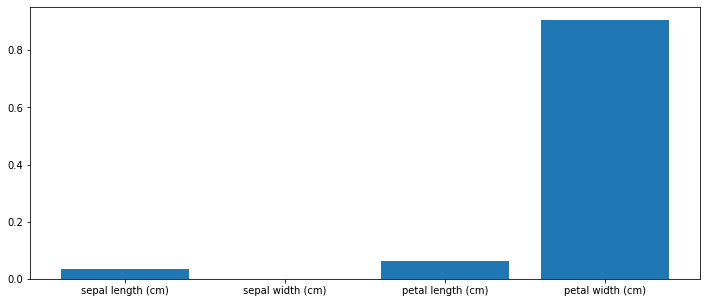

In [ ]:
# 모델에서 중요하게 여기는 feature를 출력
plt.figure(figsize=(12,5))
plt.bar(x=iris.feature_names, height=dt_clf.feature_importances_)

# cross_val_score을 활용한 간단한 교차검증

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

score = cross_val_score(dt_clf, iris_features, iris_label, scoring='accuracy', cv=5)
print('교차 검증별 정확도: ', np.round(score, 4))
print('교차 검증 평균 정확도: ', np.round(np.mean(score), 4))

교차 검증별 정확도:  [0.9667 0.9667 0.9    0.9333 1.    ]
교차 검증 평균 정확도:  0.9533


# GridSearchCV
교차검증을 활용한 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_label, random_state=22, test_size=0.2, shuffle=True)

dt_clf = DecisionTreeClassifier(random_state=22,)

params = {'max_depth':[1,2,3],
          'min_samples_split':[2,3]}

grid_dt = GridSearchCV(dt_clf, param_grid=params, cv=5, refit=True)

grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=22,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
 

In [ ]:
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001173,0.000311,0.000374,0.000085,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.708333,0.708333,0.708333,0.708333,0.666667,0.70,0.016667,5
1,0.000683,0.000129,0.000267,0.000042,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.708333,0.708333,0.708333,0.708333,0.666667,0.70,0.016667,5
2,0.000576,0.000023,0.000231,0.000005,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,0.958333,0.958333,0.916667,0.958333,0.95,0.016667,1
3,0.000581,0.000010,0.000237,0.000013,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,0.958333,0.958333,0.916667,0.958333,0.95,0.016667,1
4,0.000601,0.000028,0.000234,0.000011,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.958333,0.958333,0.958333,0.916667,0.958333,0.95,0.016667,1
5,0.000595,0.000026,0.000231,0.000010,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.958333,0.958333,0.958333,0.916667,0.958333,0.95,0.016667,1


In [ ]:
cols = ['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
scores_df[cols]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.70,5,0.708333,0.708333,0.708333,0.708333,0.666667
1,"{'max_depth': 1, 'min_samples_split': 3}",0.70,5,0.708333,0.708333,0.708333,0.708333,0.666667
2,"{'max_depth': 2, 'min_samples_split': 2}",0.95,1,0.958333,0.958333,0.958333,0.916667,0.958333
3,"{'max_depth': 2, 'min_samples_split': 3}",0.95,1,0.958333,0.958333,0.958333,0.916667,0.958333
4,"{'max_depth': 3, 'min_samples_split': 2}",0.95,1,0.958333,0.958333,0.958333,0.916667,0.958333
5,"{'max_depth': 3, 'min_samples_split': 3}",0.95,1,0.958333,0.958333,0.958333,0.916667,0.958333


In [ ]:
print('최적의 파라미터: ', grid_dt.best_params_)
print('최고의 정확도: ', grid_dt.best_score_)

최적의 파라미터:  {'max_depth': 2, 'min_samples_split': 2}
최고의 정확도:  0.95


In [ ]:
# 최적의 파라미터로 학습
estimator = grid_dt.best_estimator_

pred = estimator.predict(x_test)
print('정확도: ', accuracy_score(y_test, pred))

정확도:  0.9333333333333333
